<h1>Klasifikasi Tsunami dan Gempa - Machine Learning</h1>



In [14]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Machine Learning, Klasifikasi, dan Evaluasi
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

<h1>Load Dataset<h1>

In [3]:
file_path = 'earthquake_data_tsunami.csv'
df_earthquakes_tsunami = pd.read_csv(file_path)
df_earthquakes_tsunami.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


<h1>Pembersihan Data</h1>

In [4]:
#Cek Kolom
print("Jumlah nilai kosong per kolom:\n", df_earthquakes_tsunami.isnull().sum())

#Validasi Ulang
print("\nSetelah imputasi, nilai kosong per kolom:\n", df_earthquakes_tsunami.isnull().sum())

Jumlah nilai kosong per kolom:
 magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

Setelah imputasi, nilai kosong per kolom:
 magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64


In [5]:
before = df_earthquakes_tsunami.shape
dupes = df_earthquakes_tsunami[df_earthquakes_tsunami.duplicated(keep=False)]
print(f"Jumlah baris duplikat (terhitung ganda): {dupes.shape[0]}")
df_earthquakes_tsunami2 = df_earthquakes_tsunami.drop_duplicates(keep='first')
print("Bentuk data sebelum/ setelah hapus duplikat:", before, "->", df_earthquakes_tsunami2.shape)

Jumlah baris duplikat (terhitung ganda): 0
Bentuk data sebelum/ setelah hapus duplikat: (782, 13) -> (782, 13)


<h3>Pemisahan Fitur-Target</h3>

In [6]:
y = df_earthquakes_tsunami['tsunami']
not_needed_columns = ['tsunami', 'Year', 'Month']
X = df_earthquakes_tsunami.drop(columns=not_needed_columns)

<h3>Train Test</h3>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state = 28, stratify=y)

print("Ukuran X_train, X_test:", X_train.shape, X_test.shape)

Ukuran X_train, X_test: (547, 10) (235, 10)


<h3>Gradient Boosting Classifier</h3>

In [8]:
# ============================================================
#  PIPELINE: Feature Selection → Gradient Boosting Classifier
# ============================================================
pipe_gb = Pipeline(steps=[
    ('feat_select', SelectKBest(score_func=f_classif)),
    ('clf', GradientBoostingClassifier(random_state=28))
])

# GridSearch: dua metode seleksi fitur + parameter model
params_grid_gb = [
    {
        'feat_select': [SelectKBest(score_func=f_classif)],
        'feat_select__k': np.arange(5, 15),
        'clf__n_estimators': [100, 200],
        'clf__learning_rate': [0.01, 0.1, 0.2],
        'clf__max_depth': [2, 3, 5]
    },
    {
        'feat_select': [SelectPercentile(score_func=f_classif)],
        'feat_select__percentile': np.arange(30, 80, 10),
        'clf__n_estimators': [100, 200],
        'clf__learning_rate': [0.01, 0.1, 0.2],
        'clf__max_depth': [2, 3, 5]
    }
]

SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=28)

# Jalankan GridSearchCV
print("Menjalankan GridSearch untuk Gradient Boosting...")
start = time.time()
gscv_gb = GridSearchCV(
    pipe_gb,
    params_grid_gb,
    cv=SKF,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)
gscv_gb.fit(X_train, y_train)
print(f"GridSearch Gradient Boosting selesai dalam {time.time() - start:.2f} detik")

Menjalankan GridSearch untuk Gradient Boosting...
Fitting 5 folds for each of 270 candidates, totalling 1350 fits
GridSearch Gradient Boosting selesai dalam 120.15 detik


<h3>Evaluasi Gradient Boosting Classifier</h3>

CV Score (F1) terbaik: 0.8741186185088624
Kombinasi model terbaik: Pipeline(steps=[('feat_select', SelectKBest(k=np.int64(7))),
                ('clf',
                 GradientBoostingClassifier(max_depth=2, n_estimators=200,
                                            random_state=28))])

Skor Test (akurasi) Gradient Boosting: 0.8893617021276595

Fitur terbaik (terpilih): ['cdi' 'mmi' 'nst' 'dmin' 'gap' 'latitude' 'longitude']


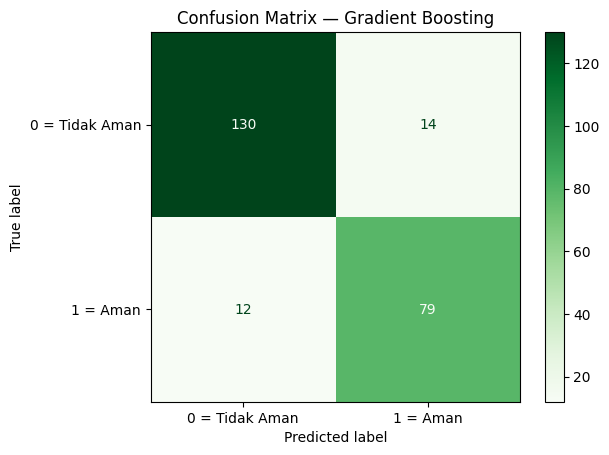


Classification Report — Gradient Boosting:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       144
           1       0.85      0.87      0.86        91

    accuracy                           0.89       235
   macro avg       0.88      0.89      0.88       235
weighted avg       0.89      0.89      0.89       235

Accuracy: 0.8894
Precision: 0.8495
Recall: 0.8681
F1-Score: 0.8587


In [9]:
# === Evaluasi Hasil Terbaik
print("CV Score (F1) terbaik:", gscv_gb.best_score_)
print("Kombinasi model terbaik:", gscv_gb.best_estimator_)

gb_test_score = gscv_gb.best_estimator_.score(X_test, y_test)
print("\nSkor Test (akurasi) Gradient Boosting:", gb_test_score)

# Fitur terbaik (jika selector mendukung get_support)
selector_gb = gscv_gb.best_estimator_.named_steps['feat_select']
if hasattr(selector_gb, 'get_support'):
    mask = selector_gb.get_support()
    selected = np.array(X.columns)[mask]
    print("\nFitur terbaik (terpilih):", selected)

# Confusion Matrix
gb_pred = gscv_gb.predict(X_test)
cm_gb = confusion_matrix(y_test, gb_pred)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=['0 = Tidak Aman','1 = Aman'])
disp_gb.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix — Gradient Boosting")
plt.show()

print("\nClassification Report — Gradient Boosting:\n", classification_report(y_test, gb_pred))
print(f"Accuracy: {accuracy_score(y_test, gb_pred):.4f}")
print(f"Precision: {precision_score(y_test, gb_pred):.4f}")
print(f"Recall: {recall_score(y_test, gb_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, gb_pred):.4f}")

<h3>Support Vector Machine</h3>

In [10]:
# ============================================================
#  PIPELINE: Scaling → Feature Selection → Support Vector Machine
# ============================================================
pipe_svm = Pipeline(steps=[
    ('scaler', StandardScaler()),  # placeholder (akan diganti di grid)
    ('feat_select', SelectKBest(score_func=f_classif)),
    ('clf', SVC(probability=True, random_state=28))
])

# GridSearch: bandingkan 2 scaler + 2 metode seleksi fitur + parameter SVM
params_grid_svm = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'feat_select': [SelectKBest(score_func=f_classif)],
        'feat_select__k': np.arange(5, 15),
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf'],
        'clf__gamma': ['scale', 'auto']
    },
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'feat_select': [SelectPercentile(score_func=f_classif)],
        'feat_select__percentile': np.arange(30, 80, 10),
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf'],
        'clf__gamma': ['scale', 'auto']
    }
]

print("Menjalankan GridSearch untuk SVM...")
start = time.time()
gscv_svm = GridSearchCV(
    pipe_svm,
    params_grid_svm,
    cv=SKF,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)
gscv_svm.fit(X_train, y_train)
print(f"GridSearch SVM selesai dalam {time.time() - start:.2f} detik")

Menjalankan GridSearch untuk SVM...
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
GridSearch SVM selesai dalam 23.34 detik


<h3>Evaluasi Support Vector Machine</h3>

CV Score (F1) terbaik: 0.8346354546792452
Kombinasi model terbaik: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('feat_select', SelectKBest(k=np.int64(6))),
                ('clf', SVC(C=10, probability=True, random_state=28))])

Skor Test (akurasi) SVM: 0.851063829787234

Fitur terbaik (terpilih): ['cdi' 'mmi' 'nst' 'dmin' 'gap' 'longitude']


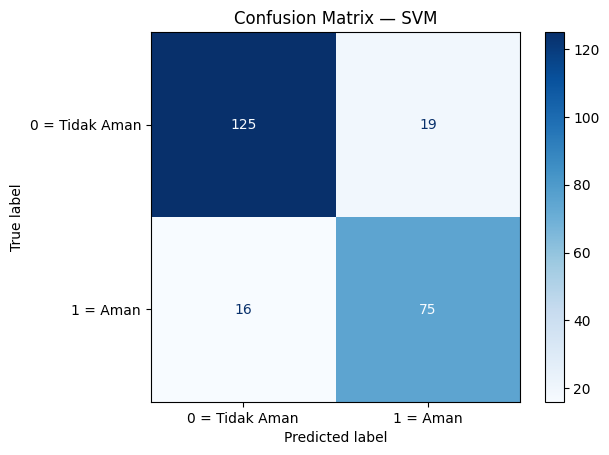


Classification Report — SVM:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       144
           1       0.80      0.82      0.81        91

    accuracy                           0.85       235
   macro avg       0.84      0.85      0.84       235
weighted avg       0.85      0.85      0.85       235

Accuracy: 0.8511
Precision: 0.7979
Recall: 0.8242
F1-Score: 0.8108


In [11]:
# === Evaluasi hasil terbaik
print("CV Score (F1) terbaik:", gscv_svm.best_score_)
print("Kombinasi model terbaik:", gscv_svm.best_estimator_)

svm_test_score = gscv_svm.best_estimator_.score(X_test, y_test)
print("\nSkor Test (akurasi) SVM:", svm_test_score)

# Fitur terbaik (jika selector mendukung get_support)
selector_svm = gscv_svm.best_estimator_.named_steps['feat_select']
if hasattr(selector_svm, 'get_support'):
    mask = selector_svm.get_support()
    selected = np.array(X.columns)[mask]
    print("\nFitur terbaik (terpilih):", selected)

# Confusion Matrix
svm_pred = gscv_svm.predict(X_test)
cm_svm = confusion_matrix(y_test, svm_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['0 = Tidak Aman','1 = Aman'])
disp_svm.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix — SVM")
plt.show()

print("\nClassification Report — SVM:\n", classification_report(y_test, svm_pred))
print(f"Accuracy: {accuracy_score(y_test, svm_pred):.4f}")
print(f"Precision: {precision_score(y_test, svm_pred):.4f}")
print(f"Recall: {recall_score(y_test, svm_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, svm_pred):.4f}")

<h3>Perbandingan Gradient Boosting Classifier dan Support Vector Machine</h3>

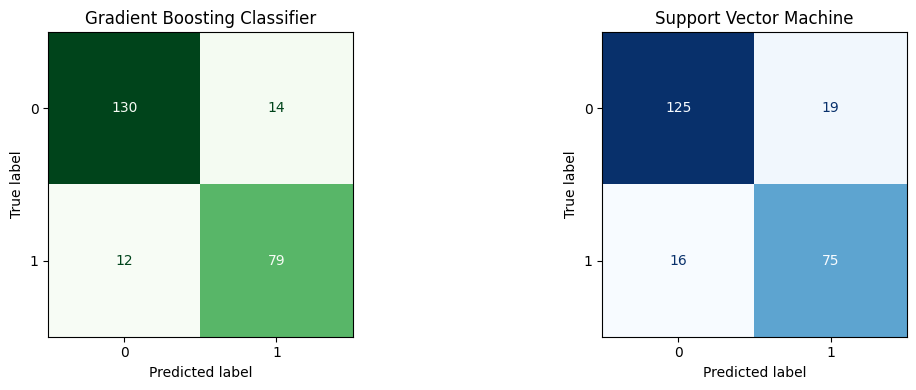

PERBANDINGAN METRIK EVALUASI

                 Model  Accuracy  Precision   Recall  F1-Score
     Gradient Boosting  0.889362   0.849462 0.868132  0.858696
Support Vector Machine  0.851064   0.797872 0.824176  0.810811

Model terbaik berdasarkan F1-Score adalah: Gradient Boosting


In [12]:
# Buat figure dengan 2 subplot berdampingan (1 baris, 2 kolom)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

# Confusion Matrix untuk Gradient Boosting Classifier
disp_gb = ConfusionMatrixDisplay.from_estimator(gscv_gb.best_estimator_, X_test, y_test, cmap=plt.cm.Greens, colorbar=False, ax=ax1)
ax1.set_title("Gradient Boosting Classifier")

# Confusion Matrix untuk Support Vector Machine
disp_svm = ConfusionMatrixDisplay.from_estimator(gscv_svm.best_estimator_, X_test, y_test, cmap=plt.cm.Blues, colorbar=False, ax=ax2)
ax2.set_title("Support Vector Machine")

# Rapikan tata letak agar subplot tidak tumpang tindih
plt.tight_layout()
plt.show()

# Hitung metrik untuk kedua model
metrics_comparison = {
    'Model': ['Gradient Boosting', 'Support Vector Machine'],
    'Accuracy': [
        accuracy_score(y_test, gb_pred),
        accuracy_score(y_test, svm_pred)
    ],
    'Precision': [
        precision_score(y_test, gb_pred),
        precision_score(y_test, svm_pred)
    ],
    'Recall': [
        recall_score(y_test, gb_pred),
        recall_score(y_test, svm_pred)
    ],
    'F1-Score': [
        f1_score(y_test, gb_pred),
        f1_score(y_test, svm_pred)
    ]
}

# Buat DataFrame untuk perbandingan
df_comparison = pd.DataFrame(metrics_comparison)

print("PERBANDINGAN METRIK EVALUASI\n")
print(df_comparison.to_string(index=False))

# Model terbaik berdasarkan F1-Score
best_idx_f1 = df_comparison['F1-Score'].idxmax()
best_model = df_comparison.loc[best_idx_f1, 'Model']
print(f"\nModel terbaik berdasarkan F1-Score adalah: {best_model}")

<h3>Import salah satu model terbaik</h3>

In [13]:
import pickle
# Ambil model terbaik dari hasil GridSearchCV
best_model_ = gscv_gb.best_estimator_.named_steps['clf']

# Simpan model terbaik ke file pickle
with open("BestModel_CLF_GB_Pandas.pkl", "wb") as f:
    pickle.dump(best_model_, f)

print("✅ Model terbaik berhasil disimpan ke 'BestModel_CLF_GB_Pandas.pkl'")

✅ Model terbaik berhasil disimpan ke 'BestModel_CLF_GB_Pandas.pkl'
